# EDA on House Prices Data
- Correlation on Train Data
- Join test and train data
- Correlation on Combined Data
- Data Dictionary
- Change columns to appropriate types in Train Data
    - categorical | add order for categorical data
    - Columns that has missing categories 
- Handling Missing Data
    - Identify columns with missing values in combined data
    - Analysis of columns with missing values
    - Filling missing values
- Save processed data    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

from scipy import stats

%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data['Id'].min(), train_data['Id'].max()

(1, 1460)

In [6]:
test_data = pd.read_csv('data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
test_data['Id'].min(), test_data['Id'].max()

(1461, 2919)

In [9]:
test_data['Id'].max() - test_data['Id'].min()

1458

## Correlation on Train Data

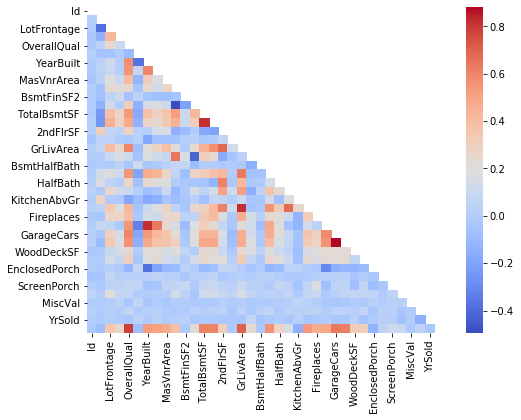

In [10]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

mask = np.triu(train_data.corr())

sns.heatmap(train_data.corr(), mask=mask, cmap= 'coolwarm')#,annot=True)


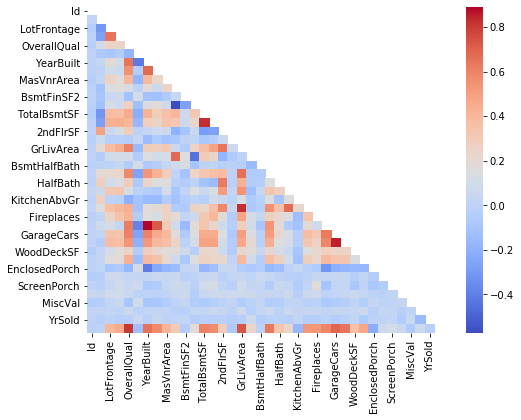

In [11]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

mask = np.triu(train_data.corr(method='spearman'))

sns.heatmap(train_data.corr(method='spearman'), mask=mask, cmap= 'coolwarm')

In [12]:
#scatter_matrix(train_data)
#plt.show()

## Join test and train data 

In [13]:
# is sale price less than 0 
(train_data['SalePrice'] < 0).sum()

0

In [14]:
# let's add a SalePrice column so that we can combine the two dataframes
test_data['SalePrice'] = -999

In [15]:
len(train_data), len(test_data)

(1460, 1459)

In [16]:
len(train_data.columns), len(test_data.columns)

(81, 81)

In [17]:
data = pd.concat([train_data, test_data])
data.shape

(2919, 81)

## Correlation on Combined  Data

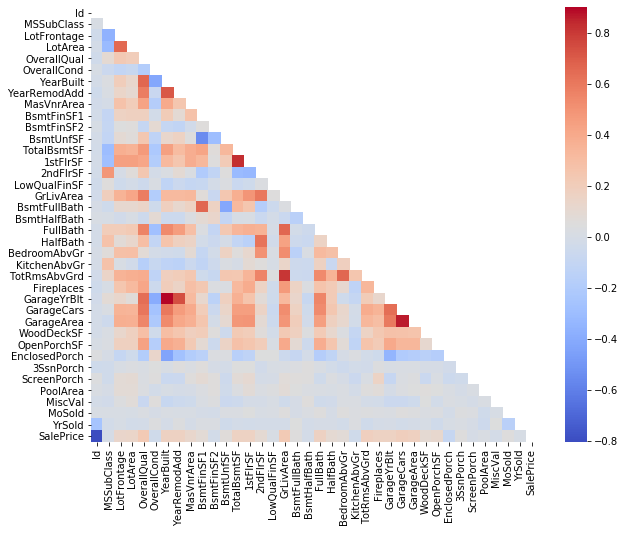

In [18]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

mask = np.triu(data.corr(method='spearman'))

sns.heatmap(data.corr(method='spearman'), mask=mask, cmap= 'coolwarm')


The above heatmap shows that negative correlations have changed and moved towrds positive number. Ignore 'Saleprice' because we added -999 for now

## Data Dictionary

Following columns are ordered:

    - OverallQual 
    - OverallCond 
    - orderded
    - ExterQual 
    - ExterCond 
    - Ordered
    - BsmtQual 
    - BsmtCond
    - HeatingQC
    - KitchenQual
    - FireplaceQu
    - GarageQual
    - GarageCond
    - PoolQC

Following columns can be considered to be ordered:
    - BsmtExposure 
    - BsmtFinType1 
    - BsmtFinType2
    
Following can be binned:
    - MSSubClass
    - YearBuilt
    - YearRemodAdd
    - GarageYrBlt
    - YrSold  

In [19]:
data_dict = {
    'MSSubClass': [20,30,40,45,50, 60,70,75,80,85,90,120,150,160,180,190], 
    'MSZoning': ['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 
    'Street': ['Grvl', 'Pave'], 
    'Alley': ['Grvl', 'Pave', 'NA'], 
    'LotShape': ['Reg','IR1', 'IR2', 'IR3'], 
    'LandContour': ['Lvl','Bnk', 'HLS','Low'], 
    'Utilities': ['AllPub','NoSewr','NoSeWa','ELO'],
    'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 
    'LandSlope': ['Gtl', 'Mod', 'Sev'], 
    'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert'
                    ,'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 
                    'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 
    'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
    'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
    'BldgType': ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], 
    'HouseStyle': ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'], 
    'OverallQual': np.arange(1,11), 
    'OverallCond': np.arange(1,11), 
    'RoofStyle': ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], 
    'RoofMatl': ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], 
    'Exterior1st': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 
                   'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'Exterior2nd': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 
                   'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'MasVnrType': ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'], 
    'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 
    'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 
    'Foundation': ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], 
    'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'BsmtCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], 
    'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'], 
    'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
    'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
    'Heating': ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], 
    'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'CentralAir': ['N', 'Y'],
    'Electrical': ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], 
    'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], 
    'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'GarageType': ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'],
    'GarageFinish': ['Fin', 'RFn', 'Unf', 'NA'],
    'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'PavedDrive': ['Y', 'P', 'N'], 
    'PoolQC': ['Ex', 'Gd', 'TA', 'Fa', 'NA'], 
    'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'], 
    'MiscFeature': ['Elev', 'Gar2', 'Othr', 'Shed', 'TenC', 'NA'],
    'SaleType': ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD','Oth'], 
    'SaleCondition': ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial']
   
}

len(data_dict.keys())

46

## Change columns to appropriate types

In [20]:
# train_data.info()

In [21]:
order_cat = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure', 'BsmtFinType1',
               'BsmtFinType2']

# year is categorical variable becuase it makes no sense to add two years. 
# Also house build in 2010 is better than the one built in 1980

year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] 

In [22]:
cat_cols = train_data.select_dtypes('object').columns.values
cat_cols

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [23]:
# columns that are categorical but not object type
additional_cat = [key for key in data_dict.keys() if key not in cat_cols]
cat_cols = np.concatenate((cat_cols, additional_cat))
cat_cols

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass',
       'OverallQual', 'OverallCond'], dtype=object)

In [24]:
for col in cat_cols:
    is_ordered = True if col in order_cat else False
    train_data[col] = pd.Categorical(train_data[col], categories=data_dict[col], ordered=is_ordered)

In [25]:
# add categories for categrical data
for col in year_cols:
    train_data[col] = pd.Categorical(train_data[col])

In [26]:
train_data.select_dtypes('category').describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1235,...,1379,1379,1379,1460,7,281,54,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,24,...,3,5,5,3,3,4,4,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Unf,TA,TA,Y,Gd,MnPrv,Shed,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,150,...,605,1311,1326,1340,3,157,49,338,1267,1198


### Columns that has missing categories

In [27]:
temp = pd.DataFrame(train_data.select_dtypes('category').describe())
temp

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1235,...,1379,1379,1379,1460,7,281,54,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,24,...,3,5,5,3,3,4,4,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Unf,TA,TA,Y,Gd,MnPrv,Shed,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,150,...,605,1311,1326,1340,3,157,49,338,1267,1198


In [28]:
print('col_name' , 'expected # of categories', ' --> ', 'actual # of categories', '-->', 'missing categories')
for i, key in enumerate(cat_cols):
    unique_val = temp.loc[['unique'], [key]].values[0][0]
    print(key , len(data_dict[key]), ' --> ', unique_val, '-->', (len(data_dict[key]) - unique_val))

col_name expected # of categories  -->  actual # of categories --> missing categories
MSZoning 8  -->  5 --> 3
Street 2  -->  2 --> 0
Alley 3  -->  2 --> 1
LotShape 4  -->  4 --> 0
LandContour 4  -->  4 --> 0
Utilities 4  -->  2 --> 2
LotConfig 5  -->  5 --> 0
LandSlope 3  -->  3 --> 0
Neighborhood 25  -->  24 --> 1
Condition1 9  -->  9 --> 0
Condition2 9  -->  8 --> 1
BldgType 5  -->  2 --> 3
HouseStyle 8  -->  8 --> 0
RoofStyle 6  -->  6 --> 0
RoofMatl 8  -->  8 --> 0
Exterior1st 17  -->  15 --> 2
Exterior2nd 17  -->  13 --> 4
MasVnrType 5  -->  4 --> 1
ExterQual 5  -->  4 --> 1
ExterCond 5  -->  5 --> 0
Foundation 6  -->  6 --> 0
BsmtQual 6  -->  4 --> 2
BsmtCond 6  -->  4 --> 2
BsmtExposure 5  -->  4 --> 1
BsmtFinType1 7  -->  6 --> 1
BsmtFinType2 7  -->  6 --> 1
Heating 6  -->  6 --> 0
HeatingQC 5  -->  5 --> 0
CentralAir 2  -->  2 --> 0
Electrical 5  -->  5 --> 0
KitchenQual 5  -->  4 --> 1
Functional 8  -->  7 --> 1
FireplaceQu 6  -->  5 --> 1
GarageType 7  -->  6 --> 1
GarageFi

In [29]:
train_data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
150      0
Name: MSSubClass, dtype: int64

In [30]:
data_dict['MSSubClass']

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]

## Handling Missing Data
### Identify columns with missing values in combined data

In [31]:
col_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
col_with_na


['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [32]:
for col in col_with_na:
    print('\n', col, ' <--> ', data[col].unique() , ' <--> ', data[col].isnull().sum())


 MSZoning  <-->  ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]  <-->  4

 LotFrontage  <-->  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]  <-->  486

 Alley  <-->  [nan 'Grvl' 'Pave']  <-->  2721

 Utilities  <-->  ['AllPub' 'NoSeWa' nan]  <-->  2

 Exterior1st  <-->  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 


### Analysis of columns with missing values

**Leave 'NAN' in categorical data as it is; it is handled as a category with -1 value** 

MSZoning - update 'C' to 'C (all)' in data dictionary because thats how it appears in test and train data; Missing values are only in test data (?)

LotFrontage - See its distribution and assign value according to that --> mean, median or mode? It follows normal distribution so subsitute with median

Alley - NA is not really a missing value. It means this house has no alley access. 
        Mostly Alley values are nan is test data

Utilities - NAN Values are in test data and train data does not have all the categories. 

Exterior1st - NAN Values are in test data

Exterior2nd - NAN Values are in test data

MasVnrType - NAN values are for test data 

MasVnrArea - See its distribution and assign value according to that --> mean, median or mode? --> subsitute with median

BsmtQual / BsmtCond / BsmtExposure / BsmtFinType1 / BsmtFinType2 
BsmtQual  - NAN values are for test data 
BsmtCond - NAN values are for test data 

BsmtFinSF1 - NAN values are for test data 

BsmtFinType2 - NAN values are for test data 

BsmtFinSF2 - NAN values are for test data

BsmtUnfSF - NAN values are for test data

GarageYrBlt - These are houses who have no garage so year really is not a predictor for these houses 



**MSZoning**

In [33]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [34]:
data[data['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,-999
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,-999
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,-999
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,-999


In [35]:
data[data['MSZoning'] == 'C (all)']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400


**LotFrontage**

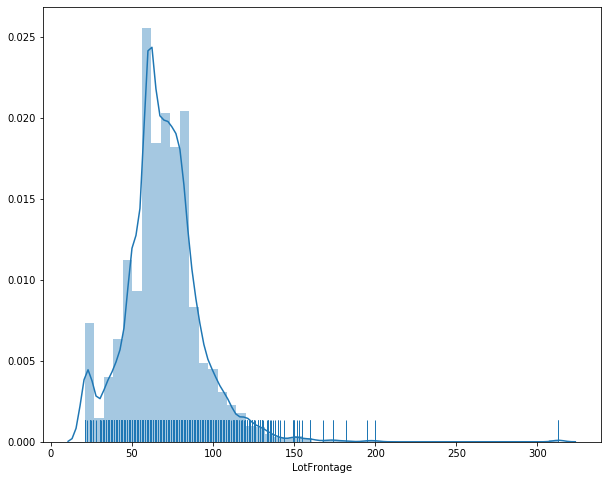

In [36]:
sns.distplot(data['LotFrontage'], rug=True)

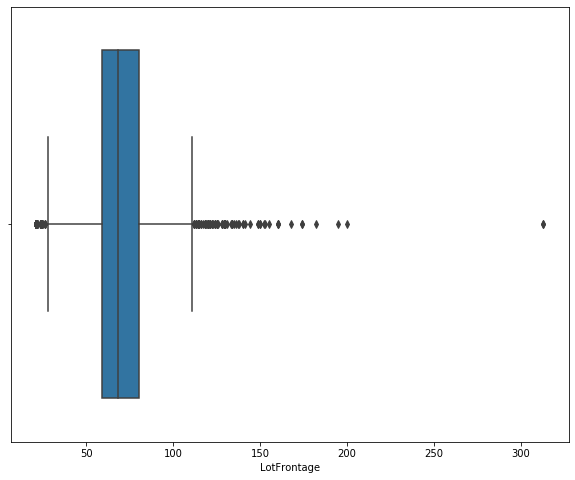

In [37]:
sns.boxplot(data['LotFrontage'])
plt.show()

In [38]:
stats.mode(data['LotFrontage'])[0] ,np.nanmedian(data['LotFrontage']), np.mean(data['LotFrontage'])

(array([60.]), 68.0, 69.30579531442663)

**Alley**

In [39]:
(data['Alley'].isna()) & (data['SalePrice'] == -999)

0       False
1       False
2       False
3       False
4       False
        ...  
1454     True
1455     True
1456     True
1457     True
1458     True
Length: 2919, dtype: bool

In [40]:
#Mostly Alley values are nan is test data
len(data[(data['Alley'].isna()) & (data['SalePrice'] == -999)] )

1352

In [41]:
data[data['Alley'] == 'No Alley']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Utilities**

In [42]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [43]:
data[data['Utilities'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,-999
485,1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,...,0,NaN,NaN,Shed,750,5,2008,WD,Normal,-999


**Exterior1st**

In [44]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [45]:
data[data['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,-999


**Exterior2nd**

In [46]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [47]:
data[data['Exterior2nd'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,-999


**MasVnrType**

In [48]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [49]:
data[data['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000
231,1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,-999
246,1707,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,-999


**MasVnrArea**

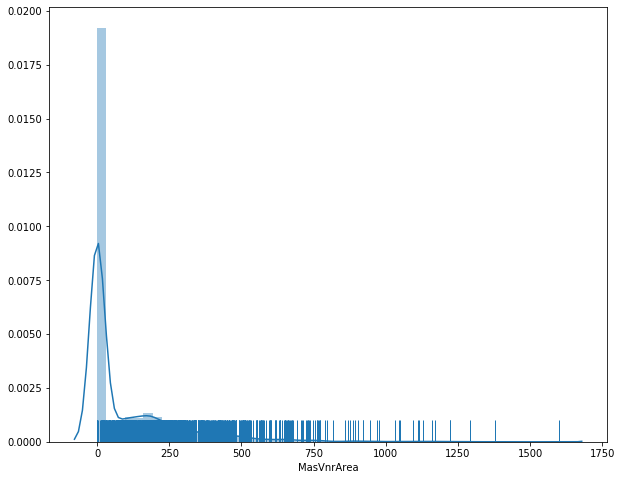

In [50]:
sns.distplot(data['MasVnrArea'], rug=True)

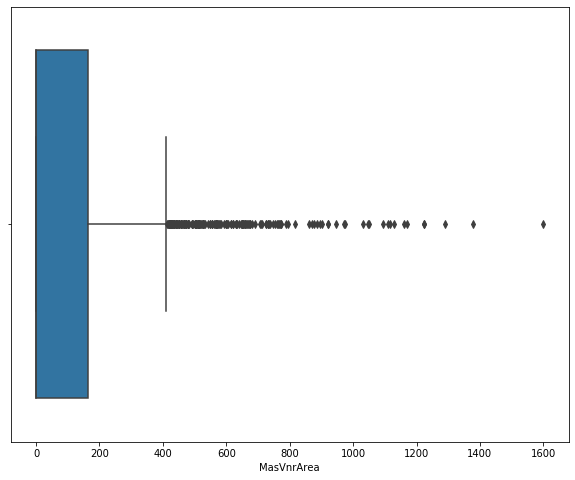

In [51]:
sns.boxplot(data['MasVnrArea'])

In [52]:
stats.mode(data['MasVnrArea'])[0] , np.nanmedian(data['MasVnrArea']), np.mean(data['MasVnrArea'])

(array([0.]), 0.0, 102.20131215469613)

**BsmtQual**

In [53]:
data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [54]:
len(data[(data['BsmtQual'].isnull()) & (data['SalePrice'] == -999)])

44

**BsmtCond**

In [55]:
data['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [56]:
len(data[(data['BsmtCond'].isnull()) & (data['SalePrice'] == -999)])

45

**BsmtFinSF1**

In [57]:
data[data['BsmtFinSF1'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,-999


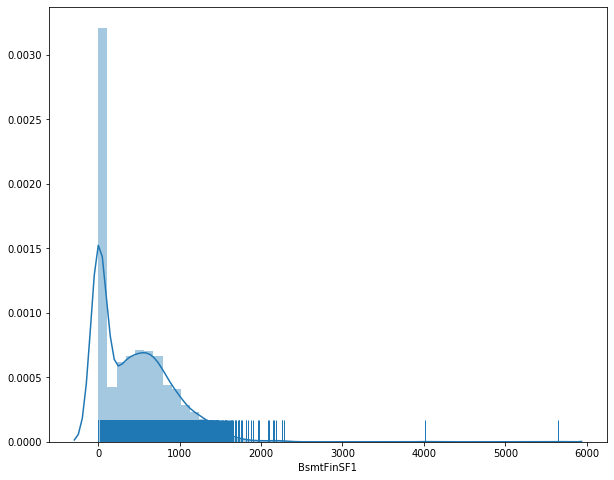

In [58]:
sns.distplot(data['BsmtFinSF1'], rug=True)

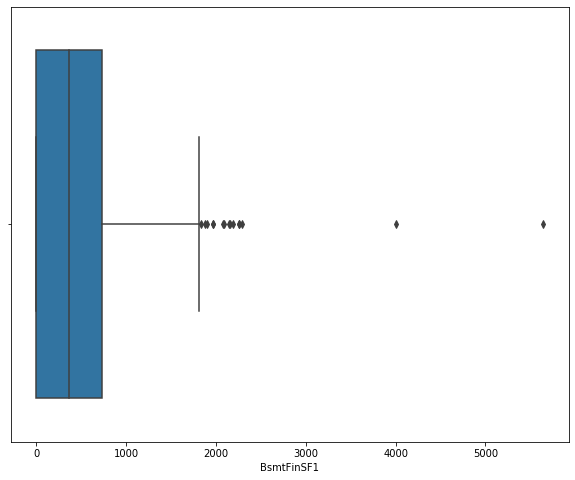

In [59]:
sns.boxplot(data['BsmtFinSF1'])
plt.show()

**BsmtFinType2**

In [60]:
data['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [61]:
len(data[(data['BsmtFinType2'].isnull()) & (data['SalePrice'] == -999)])

42

**BsmtFinSF2**

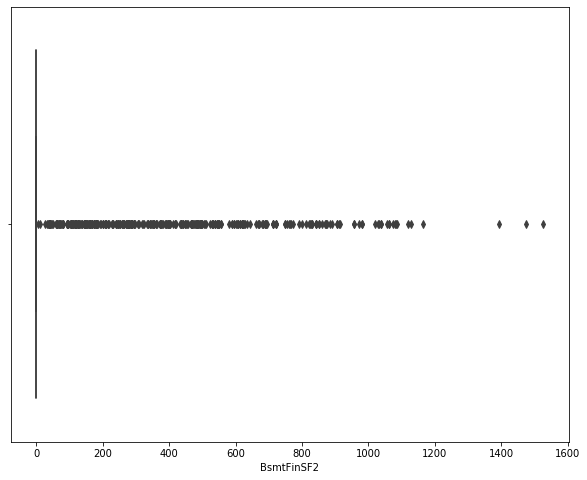

In [62]:
sns.boxplot(data['BsmtFinSF2'])
plt.show()

In [63]:
stats.mode(data['BsmtFinSF2'])[0] , np.nanmedian(data['BsmtFinSF2']), np.mean(data['BsmtFinSF2'])

(array([0.]), 0.0, 49.58224811514736)

In [64]:
len(data[(data['BsmtFinSF2'].isnull()) & (data['SalePrice'] == -999)])

1

**BsmtUnfSF**

In [65]:
len(data[(data['BsmtUnfSF'].isnull()) & (data['SalePrice'] == -999)])

1

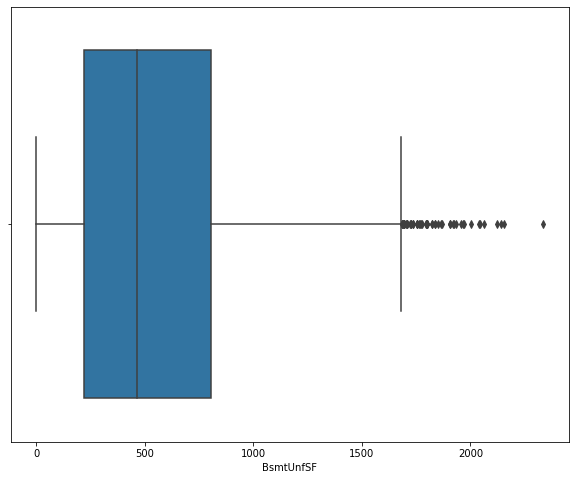

In [66]:
sns.boxplot(data['BsmtUnfSF'])
plt.show()

In [67]:
stats.mode(data['BsmtUnfSF'])[0] , np.nanmedian(data['BsmtUnfSF']), np.mean(data['BsmtUnfSF'])

(array([0.]), 467.0, 560.7721041809458)

**GarageYrBlt**

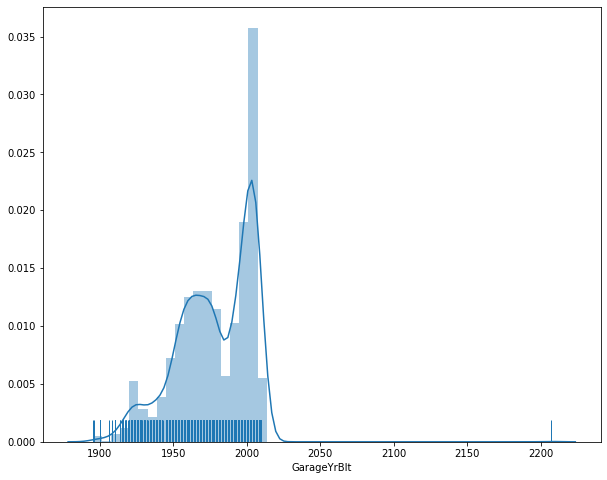

In [68]:
sns.distplot(data['GarageYrBlt'], rug=True)

In [69]:
data['GarageYrBlt'].unique(),' <--> ' , len(data['GarageYrBlt'].unique())

(array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
        1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
        1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
        1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
        1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
        1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
        1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
        1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
        1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
        1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
        1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933., 1917.,
        1896., 1895., 2207., 1943., 1919.]),
 ' <--> ',
 104)

In [70]:
data['GarageYrBlt'].min(), data['GarageYrBlt'].max()

(1895.0, 2207.0)

In [71]:
data['YearBuilt'].min(),data['YearBuilt'].max()

(1872, 2010)

In [72]:
data['YearRemodAdd'].min(), data['YearRemodAdd'].max()

(1950, 2010)

In [73]:
data['YrSold'].min(), data['YrSold'].max()

(2006, 2010)

In [74]:
# number of records who have no garage; so garage year will be null?
data[data['GarageType'].isnull()]['GarageYrBlt'].isnull().sum()

157

In [75]:
data[data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [76]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [77]:
# if garage is none then all of these columns must be null
data[data['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].sum()

GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

### Filling missing values

Fill in missing values for following columns only
- LotFrontage --> median 
- MasVnrArea  --> median


In [78]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['LotFrontage'].isnull().sum()

0

In [79]:
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(), inplace=True)
train_data['MasVnrArea'].isnull().sum()

0

In [80]:
#now check any cols with missing data
[col for col in train_data.columns if train_data[col].isnull().sum() > 0]

['Alley',
 'Neighborhood',
 'BldgType',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [81]:
#save data to file
pd.to_pickle(train_data, 'data/train_data_cat_missing_handled.pkl')